# Import Libraries

In [1]:
#for visualization

import matplotlib.pyplot as plt
import imageio
import matplotlib.image as img
from tensorflow.keras.preprocessing import image
import numpy as np
#read image path

import pathlib
from pathlib import Path


#for image processing

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
#for model

import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import *

#for warnings
import warnings
warnings.filterwarnings("ignore")

# Read Dataset

In [6]:
df=pathlib.Path('/kaggle/input/gender-recognizer/dataset')

In [8]:
image_class=os.listdir('/kaggle/input/gender-recognizer/dataset')
image_class

['MEN', 'WOMAN']

# Visualize Data


In [11]:
def plot_images(image_class):
    plt.figure(figsize=(14 ,14))
    for i , category in enumerate(image_class):
        image_path = df / category
        image_in_folder = os.listdir(image_path)
        
        first_image=image_in_folder[0]
        first_image_path=image_path  / first_image
        
        img = image.load_img(first_image_path)
        img_array=image.img_to_array(img)/255
        
        plt.subplot(4 , 4 , i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

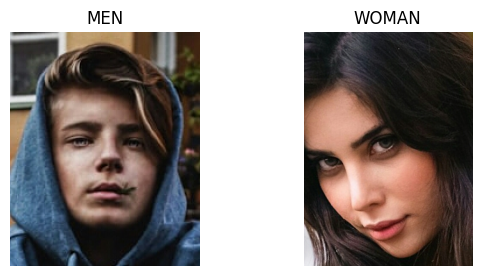

In [12]:
plot_images(image_class)


# Image Preprocessing


In [13]:
image_generator = ImageDataGenerator(rescale = 1/255 , validation_split=0.2)

In [15]:
train_data=image_generator.flow_from_directory('/kaggle/input/gender-recognizer/dataset',
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical',
                                             shuffle=True,
                                             subset='training')

Found 1550 images belonging to 2 classes.


In [16]:
test_data=image_generator.flow_from_directory('/kaggle/input/gender-recognizer/dataset',
                                             target_size=(224,224),
                                             batch_size=1,
                                             class_mode='categorical',
                                             shuffle=True,
                                             subset='validation')

Found 387 images belonging to 2 classes.


# CNN Model building

In [17]:
model = Sequential()
#convolutional layer 
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[224, 224, 3]))
#pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
#convolutional layer
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
#pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
#Add Flatten
model.add(Flatten())
#Fully Connected layer 
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model_history=model.fit(train_data, epochs=5, validation_data=test_data)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.5899 - loss: 2.9616 - val_accuracy: 0.6667 - val_loss: 0.6516
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.6611 - loss: 0.6419 - val_accuracy: 0.6667 - val_loss: 0.6679
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.6842 - loss: 0.6301 - val_accuracy: 0.6667 - val_loss: 0.6542
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.6756 - loss: 0.6170 - val_accuracy: 0.6667 - val_loss: 0.7037
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.6736 - loss: 0.6040 - val_accuracy: 0.6667 - val_loss: 0.6799


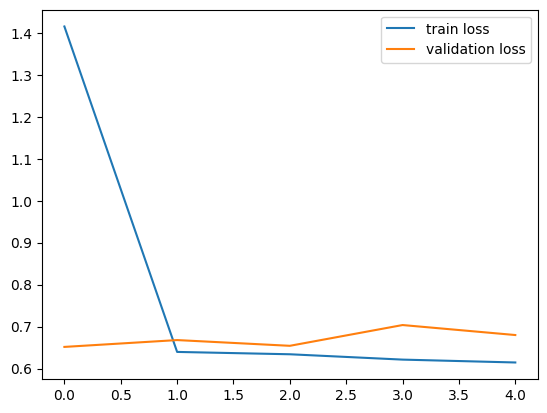

In [18]:
plt.plot(model_history.history['loss'],label='train loss')
plt.plot(model_history.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

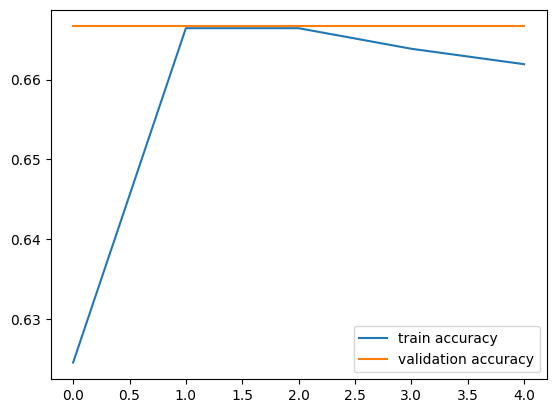

In [19]:
plt.plot(model_history.history['accuracy'],label='train accuracy')
plt.plot(model_history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [20]:
model.evaluate(train_data)

49/49 ━━━━━━━━━━━━━━━━━━━━ 37s 749ms/step - accuracy: 0.6718 - loss: 0.5883


[0.5926908850669861, 0.666451632976532]

In [21]:
model.evaluate(test_data)

387/387 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.6338 - loss: 0.7234


[0.6798969507217407, 0.6666666865348816]